# Practical 3

### The Southern Ocean

We want to map the Southern Ocean from 60°S along with the Antarctic continent.

1. Start by importing the relevant packages

In [32]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

2. Select an appropriate projection

 In the polar regions, the Azimuthal Stereographic projection is best suited.

In [9]:
ccrs.SouthPolarStereo()

<Projected CRS: +proj=stere +ellps=WGS84 +lat_0=-90 +lon_0=0.0 +x_ ...>
Name: unknown
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant A)
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

3. Creating and formatting the plot with the correct extent

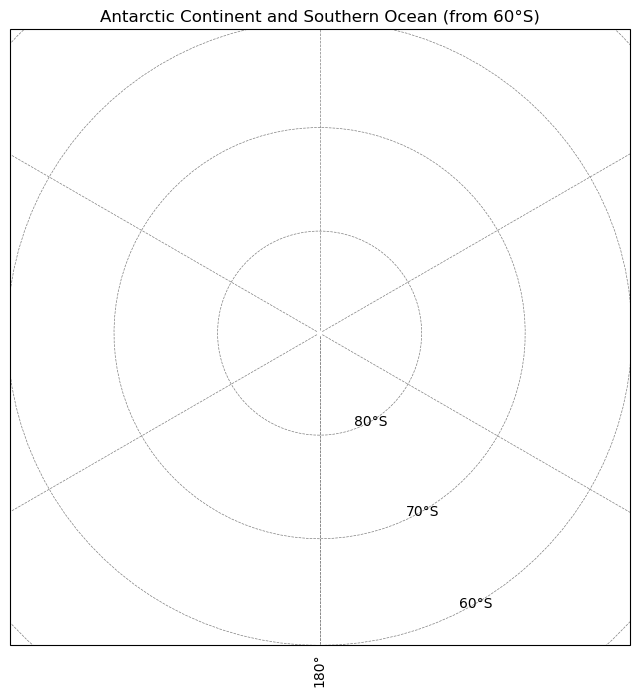

In [30]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree()) #sets the extent from 60°S
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.right_labels = False
gl.top_labels = False
ax.set_title("Antarctic Continent and Southern Ocean (from 60°S)", fontsize=12) #adding a title
plt.show()

4. Adding features to the map

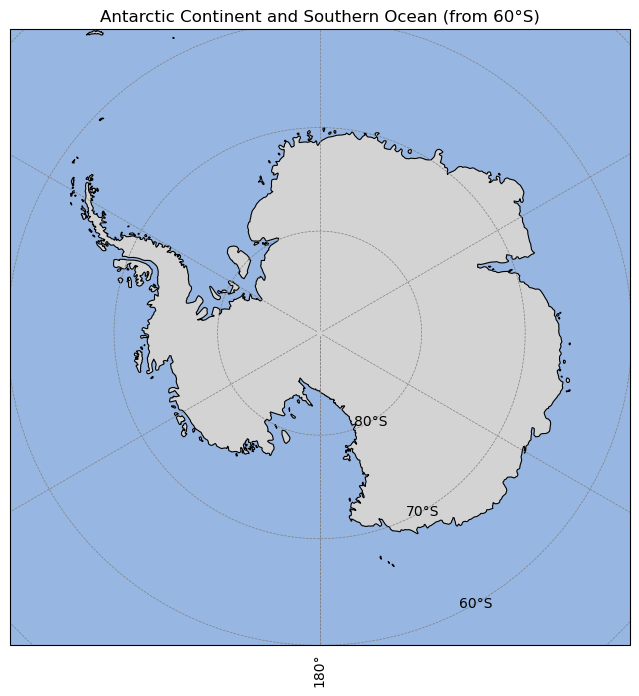

In [93]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree()) #sets the extent from 60°S
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.right_labels = False
gl.top_labels = False
ax.set_title("Antarctic Continent and Southern Ocean (from 60°S)", fontsize=12) #adding a title

#Add features
ax.add_feature(cfeature.LAND, color='lightgray') #adds the Antarctic continent in light grey
ax.add_feature(cfeature.COASTLINE, linewidth=0.8) #creates a border around the continent using the coastline
ax.add_feature(cfeature.OCEAN) #adds the ocean in default blue

plt.show()

### The South Atlantic Ocean

We want to create a map of the South Atlantic (20°S to 50°S) that includes locations: Walvis Bay, Cape Town, Rio de Janeiro, and Montevideo.

1. Import relevant packages

This was already completed in the first section but can be done again:

In [34]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

2. Pick a relevant projection

We now move away from the Southern Ocean, and must pick a projection that better suits latitudes 20°S to 50°S. The Mercator projection works well for mid-latitude regions.

In [35]:
ccrs.Mercator()

<Projected CRS: +proj=merc +ellps=WGS84 +lon_0=0.0 +x_0=0.0 +y_0=0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Mercator (variant A)
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

3. Defining wanted locations

We now need to add the latitude and longitude of Walvis Bay, Cape Town, Rio de Janeiro, and Montevideo.

In [82]:
locations_east = {
    "Walvis Bay": (14.505, -22.957),
    "Cape Town": (18.424, -33.924),
}

locations_west = {
    "Rio de Janeiro": (-43.172, -22.906),
    "Montevideo": (-56.164, -34.901)
}

4. Creating and formatting the plot with the correct extent

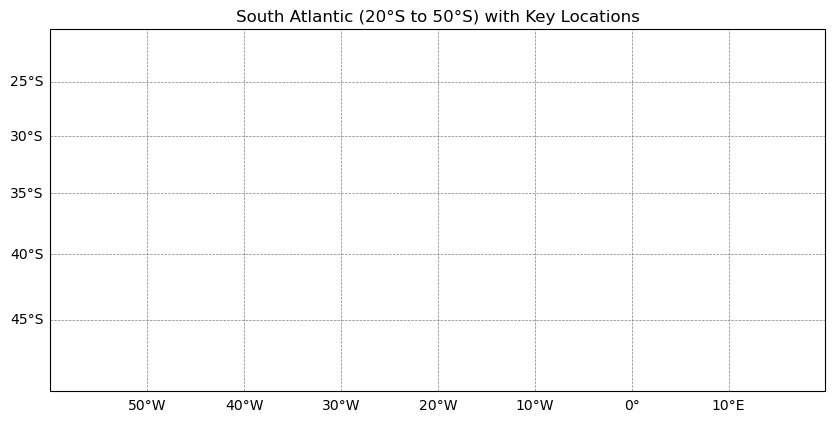

In [38]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-60, 20, -50, -20], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.right_labels = False
gl.top_labels = False
ax.set_title("South Atlantic (20°S to 50°S) with Key Locations", fontsize=12)
plt.show()

5. Adding features

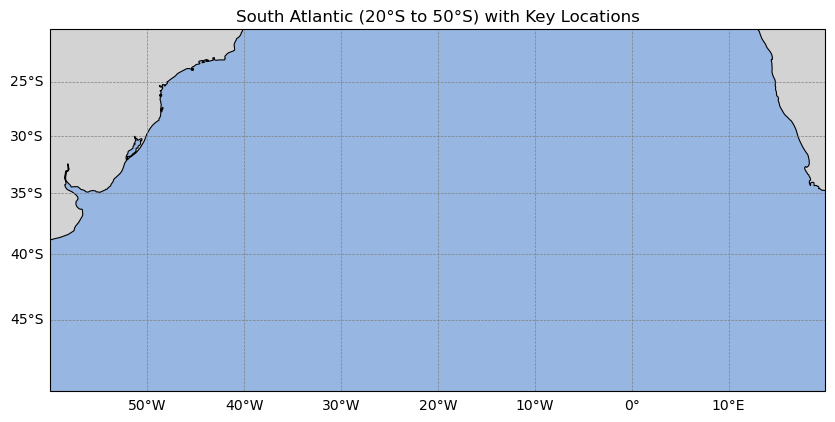

In [77]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-60, 20, -50, -20], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.right_labels = False
gl.top_labels = False
ax.set_title("South Atlantic (20°S to 50°S) with Key Locations", fontsize=12)

#Add features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.OCEAN)

plt.show()

6. Plotting defined locations

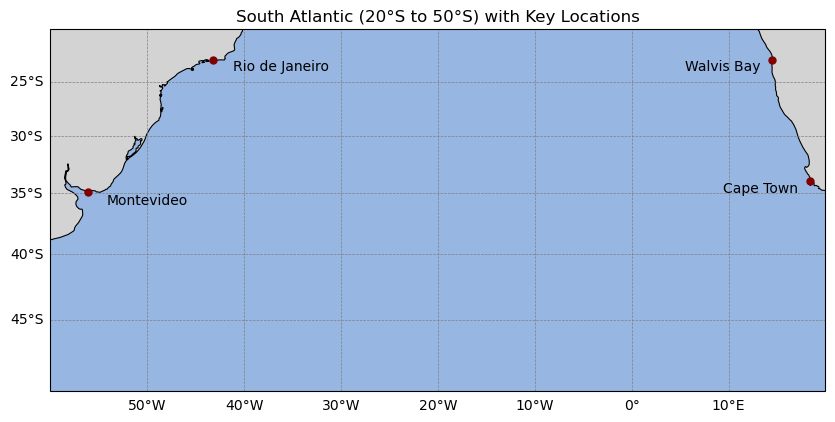

In [96]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-60, 20, -50, -20], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gl.right_labels = False
gl.top_labels = False
ax.set_title("South Atlantic (20°S to 50°S) with Key Locations", fontsize=12)

#Add features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.OCEAN)

#Add locations
for city, (lon, lat) in locations_east.items():
    ax.plot(lon, lat, marker="o", markersize=5, color="maroon", transform=ccrs.PlateCarree())
    ax.text(lon - 9, lat - 1, city, fontsize=10, transform=ccrs.PlateCarree())

for city, (lon, lat) in locations_west.items():
    ax.plot(lon, lat, marker="o", markersize=5, color="maroon", transform=ccrs.PlateCarree())
    ax.text(lon + 2, lat - 1, city, fontsize=10, transform=ccrs.PlateCarree())

plt.show()

### False Bay plots

We want to create a series of 3 panels showing the GSHHG coarse, intermediate and full coastline resolutions for False Bay.

1. Import relevant packages

We have already imported most of the packages we will need. We must now add the cartopy shapereader.

In [61]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

2. Select a projection

We are now dealing with a small region, and must pick a projection that minimises distortion. The Transverse Mercator projection is well-suited for for False Bay.

In [62]:
ccrs.Mercator()

<Projected CRS: +proj=merc +ellps=WGS84 +lon_0=0.0 +x_0=0.0 +y_0=0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Mercator (variant A)
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

3. Create the map to the correct extent

The approximate latitude and longtitude coordinates for False Bay are: Longitude range: 18.2°E to 19.2°E, Latitude range: -34.6°S to -34.0°S.

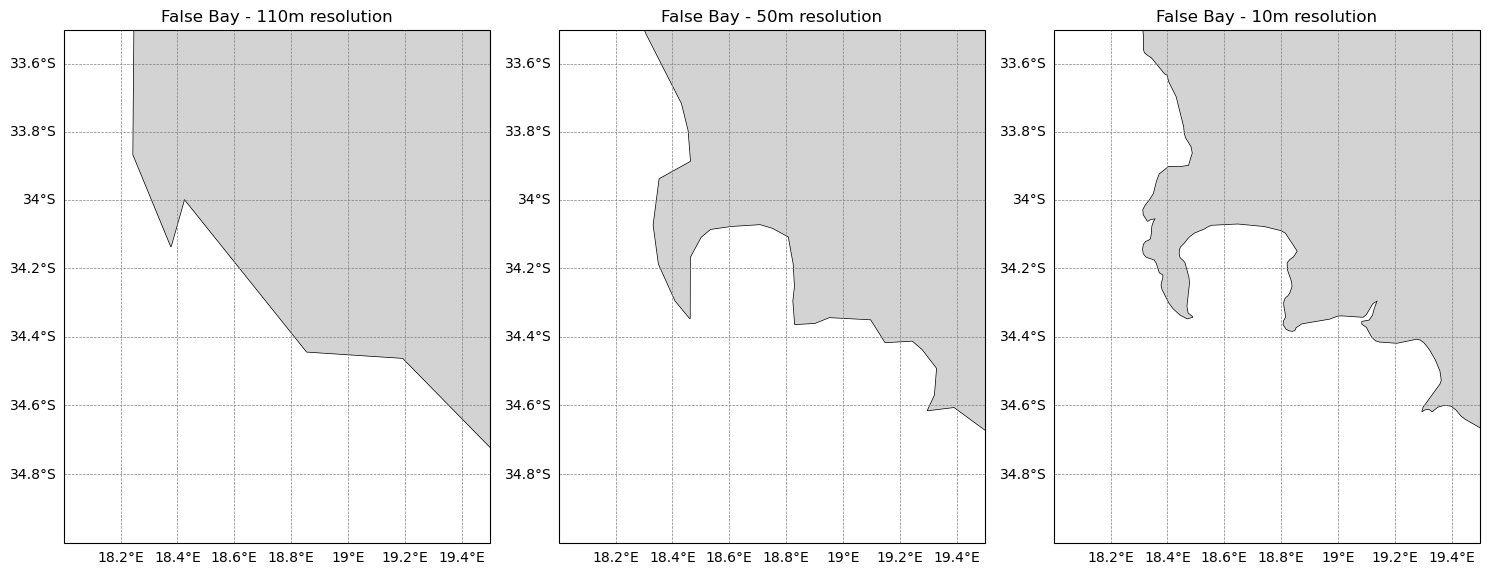

In [92]:
# Define the different resolutions
resolutions = ["110m", "50m", "10m"]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 10), subplot_kw={'projection': ccrs.Mercator()})

for ax, res in zip(axes, resolutions):
    # Set extent for False Bay
    ax.set_extent([18, 19.5, -35, -33.5], crs=ccrs.PlateCarree())

    # Add coastline at different resolutions
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', res, edgecolor='black', linewidth=1))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', res, facecolor='lightgray', edgecolor='none'))

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
    gl.right_labels = False
    gl.top_labels = False

    # Title
    ax.set_title(f"False Bay - {res} resolution")

# Adjust layout
plt.tight_layout()
plt.show()